In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# select relevant columns

df = df[["Age" , "EstimatedSalary" , "Purchased"]]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[: , 0:2]
y = df.iloc[:, -1]

In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
# Standardization of data
from sklearn.preprocessing import StandardScaler

In [9]:
Sc = StandardScaler()

In [11]:
X_scaled = Sc.fit_transform(X)
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y ,test_size = 0.2 , random_state = 20)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential


In [18]:
model = Sequential()

In [19]:
model.add(Dense(10 , activation = 'relu' , input_dim = 2))
model.add(Dense(10 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Parveen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [25]:
history = model.fit(X_scaled , y, epochs = 500 , batch_size = 320, validation_split = 0.2) # batch_size = n(X_train) then it is BGD

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8969 - loss: 0.2270 - val_accuracy: 0.9750 - val_loss: 0.2575
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8969 - loss: 0.2269 - val_accuracy: 0.9750 - val_loss: 0.2553
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8969 - loss: 0.2268 - val_accuracy: 0.9750 - val_loss: 0.2573
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8969 - loss: 0.2267 - val_accuracy: 0.9750 - val_loss: 0.2556
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8969 - loss: 0.2266 - val_accuracy: 0.9750 - val_loss: 0.2574
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8969 - loss: 0.2265 - val_accuracy: 0.9750 - val_loss: 0.2554
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8969 - loss: 0.2264 - val_accuracy: 0.9750 - val_loss: 0.2574
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8969 - loss: 0.2264 - val_accuracy: 0.9750 - val_loss:

Epoch 52/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9000 - loss: 0.2226 - val_accuracy: 0.9875 - val_loss: 0.2515
Epoch 53/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9000 - loss: 0.2225 - val_accuracy: 0.9750 - val_loss: 0.2530
Epoch 54/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9000 - loss: 0.2224 - val_accuracy: 0.9875 - val_loss: 0.2517
Epoch 55/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9031 - loss: 0.2224 - val_accuracy: 0.9750 - val_loss: 0.2534
Epoch 56/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9000 - loss: 0.2223 - val_accuracy: 0.9750 - val_loss: 0.2508
Epoch 57/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9031 - loss: 0.2222 - val_accuracy: 0.9750 - val_loss: 0.2535
Epoch 58/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9000 - loss: 0.2221 - val_accuracy: 0.9750 - val_loss: 0.2509
Epoch 59/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9031 - loss: 0.2220 - val_accuracy: 0.9750 - v

Epoch 103/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9031 - loss: 0.2189 - val_accuracy: 0.9625 - val_loss: 0.2516
Epoch 104/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9031 - loss: 0.2188 - val_accuracy: 0.9625 - val_loss: 0.2497
Epoch 105/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9031 - loss: 0.2188 - val_accuracy: 0.9625 - val_loss: 0.2520
Epoch 106/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9000 - loss: 0.2187 - val_accuracy: 0.9625 - val_loss: 0.2497
Epoch 107/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9031 - loss: 0.2186 - val_accuracy: 0.9625 - val_loss: 0.2521
Epoch 108/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9000 - loss: 0.2186 - val_accuracy: 0.9625 - val_loss: 0.2488
Epoch 109/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9031 - loss: 0.2185 - val_accuracy: 0.9625 - val_loss: 0.2523
Epoch 110/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9000 - loss: 0.2185 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9000 - loss: 0.2158 - val_accuracy: 0.9625 - val_loss: 0.2528
Epoch 154/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9000 - loss: 0.2157 - val_accuracy: 0.9625 - val_loss: 0.2498
Epoch 155/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9000 - loss: 0.2157 - val_accuracy: 0.9625 - val_loss: 0.2528
Epoch 156/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9000 - loss: 0.2156 - val_accuracy: 0.9625 - val_loss: 0.2494
Epoch 157/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9000 - loss: 0.2156 - val_accuracy: 0.9625 - val_loss: 0.2524
Epoch 158/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9000 - loss: 0.2155 - val_accuracy: 0.9625 - val_loss: 0.2499
Epoch 159/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9000 - loss: 0.2154 - val_accuracy: 0.9625 - val_loss: 0.2526
Epoch 160/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9000 - loss: 0.2154 - val_accuracy: 0.9625 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9031 - loss: 0.2129 - val_accuracy: 0.9500 - val_loss: 0.2536
Epoch 204/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9000 - loss: 0.2128 - val_accuracy: 0.9500 - val_loss: 0.2491
Epoch 205/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9031 - loss: 0.2128 - val_accuracy: 0.9500 - val_loss: 0.2548
Epoch 206/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9000 - loss: 0.2128 - val_accuracy: 0.9500 - val_loss: 0.2484
Epoch 207/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9031 - loss: 0.2127 - val_accuracy: 0.9500 - val_loss: 0.2544
Epoch 208/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9000 - loss: 0.2126 - val_accuracy: 0.9500 - val_loss: 0.2503
Epoch 209/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9031 - loss: 0.2126 - val_accuracy: 0.9500 - val_loss: 0.2530
Epoch 210/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9000 - loss: 0.2125 - val_accuracy: 0.9500 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9031 - loss: 0.2104 - val_accuracy: 0.9500 - val_loss: 0.2539
Epoch 254/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9000 - loss: 0.2104 - val_accuracy: 0.9500 - val_loss: 0.2507
Epoch 255/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9031 - loss: 0.2104 - val_accuracy: 0.9500 - val_loss: 0.2553
Epoch 256/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9000 - loss: 0.2103 - val_accuracy: 0.9500 - val_loss: 0.2494
Epoch 257/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9062 - loss: 0.2103 - val_accuracy: 0.9500 - val_loss: 0.2552
Epoch 258/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9000 - loss: 0.2102 - val_accuracy: 0.9500 - val_loss: 0.2509
Epoch 259/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9031 - loss: 0.2102 - val_accuracy: 0.9500 - val_loss: 0.2534
Epoch 260/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9000 - loss: 0.2101 - val_accuracy: 0.9500 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9062 - loss: 0.2084 - val_accuracy: 0.9500 - val_loss: 0.2552
Epoch 304/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9062 - loss: 0.2083 - val_accuracy: 0.9500 - val_loss: 0.2524
Epoch 305/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9062 - loss: 0.2083 - val_accuracy: 0.9500 - val_loss: 0.2551
Epoch 306/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9062 - loss: 0.2083 - val_accuracy: 0.9500 - val_loss: 0.2518
Epoch 307/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9062 - loss: 0.2082 - val_accuracy: 0.9500 - val_loss: 0.2570
Epoch 308/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9031 - loss: 0.2083 - val_accuracy: 0.9500 - val_loss: 0.2500
Epoch 309/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9062 - loss: 0.2082 - val_accuracy: 0.9500 - val_loss: 0.2574
Epoch 310/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9031 - loss: 0.2082 - val_accuracy: 0.9500 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9094 - loss: 0.2070 - val_accuracy: 0.9500 - val_loss: 0.2588
Epoch 354/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9062 - loss: 0.2069 - val_accuracy: 0.9500 - val_loss: 0.2538
Epoch 355/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9094 - loss: 0.2069 - val_accuracy: 0.9500 - val_loss: 0.2578
Epoch 356/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9062 - loss: 0.2069 - val_accuracy: 0.9500 - val_loss: 0.2542
Epoch 357/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9094 - loss: 0.2069 - val_accuracy: 0.9500 - val_loss: 0.2585
Epoch 358/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9062 - loss: 0.2068 - val_accuracy: 0.9500 - val_loss: 0.2534
Epoch 359/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9094 - loss: 0.2068 - val_accuracy: 0.9500 - val_loss: 0.2587
Epoch 360/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9062 - loss: 0.2068 - val_accuracy: 0.9500 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9094 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.2586
Epoch 404/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9125 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.2573
Epoch 405/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9094 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.2606
Epoch 406/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9125 - loss: 0.2058 - val_accuracy: 0.9500 - val_loss: 0.2543
Epoch 407/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9094 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.2628
Epoch 408/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9094 - loss: 0.2059 - val_accuracy: 0.9500 - val_loss: 0.2539
Epoch 409/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9094 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.2615
Epoch 410/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9094 - loss: 0.2058 - val_accuracy: 0.9500 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2599
Epoch 454/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2607
Epoch 455/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2598
Epoch 456/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2591
Epoch 457/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2627
Epoch 458/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2562
Epoch 459/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_loss: 0.2654
Epoch 460/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9125 - loss: 0.2050 - val_accuracy: 0.9375 - val_los

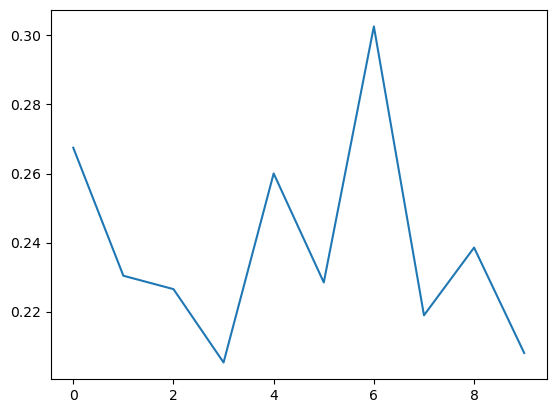

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [26]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)                                                        # batch_size = 1 then it is SGD

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9012 - loss: 0.2198 - val_accuracy: 0.9500 - val_loss: 0.2033
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9241 - loss: 0.2017 - val_accuracy: 0.9500 - val_loss: 0.2133
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8899 - loss: 0.2682 - val_accuracy: 0.9500 - val_loss: 0.1814
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9165 - loss: 0.2020 - val_accuracy: 0.9500 - val_loss: 0.2077
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8859 - loss: 0.2504 - val_accuracy: 0.9500 - val_loss: 0.1638
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8811 - loss: 0.2925 - val_accuracy: 0.9500 - val_loss: 0.1640
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9047 - loss: 0.1992 - val_accuracy: 0.9500 - val_loss: 0.1680
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8739 - loss: 0.3

Epoch 51/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9083 - loss: 0.2920 - val_accuracy: 0.9375 - val_loss: 0.1883
Epoch 52/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.2347 - val_accuracy: 0.9250 - val_loss: 0.1994
Epoch 53/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9136 - loss: 0.2670 - val_accuracy: 0.9375 - val_loss: 0.1911
Epoch 54/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9122 - loss: 0.2184 - val_accuracy: 0.9375 - val_loss: 0.1809
Epoch 55/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9097 - loss: 0.2772 - val_accuracy: 0.9250 - val_loss: 0.2077
Epoch 56/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8705 - loss: 0.3608 - val_accuracy: 0.9375 - val_loss: 0.1827
Epoch 57/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2566 - val_accuracy: 0.9250 - val_loss: 0.1827
Epoch 58/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.2571 - 

Epoch 101/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9070 - loss: 0.2597 - val_accuracy: 0.9125 - val_loss: 0.2159
Epoch 102/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9363 - loss: 0.2146 - val_accuracy: 0.9250 - val_loss: 0.2088
Epoch 103/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2248 - val_accuracy: 0.9125 - val_loss: 0.2363
Epoch 104/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9215 - loss: 0.2182 - val_accuracy: 0.9250 - val_loss: 0.2091
Epoch 105/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9261 - loss: 0.2380 - val_accuracy: 0.9250 - val_loss: 0.2054
Epoch 106/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9188 - loss: 0.2300 - val_accuracy: 0.9250 - val_loss: 0.2180
Epoch 107/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8749 - loss: 0.3186 - val_accuracy: 0.9250 - val_loss: 0.2101
Epoch 108/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9175 - loss: 0

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.3131 - val_accuracy: 0.9125 - val_loss: 0.2491
Epoch 151/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3267 - val_accuracy: 0.9000 - val_loss: 0.2627
Epoch 152/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1659 - val_accuracy: 0.9250 - val_loss: 0.2210
Epoch 153/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9192 - loss: 0.2700 - val_accuracy: 0.9250 - val_loss: 0.2342
Epoch 154/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.3006 - val_accuracy: 0.9250 - val_loss: 0.2321
Epoch 155/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9016 - loss: 0.2559 - val_accuracy: 0.9250 - val_loss: 0.2299
Epoch 156/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.1840 - val_accuracy: 0.9250 - val_loss: 0.2283
Epoch 157/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2059 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.2826 - val_accuracy: 0.9250 - val_loss: 0.2370
Epoch 200/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9096 - loss: 0.2876 - val_accuracy: 0.9125 - val_loss: 0.2732
Epoch 201/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9195 - loss: 0.2248 - val_accuracy: 0.9125 - val_loss: 0.2564
Epoch 202/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9323 - loss: 0.1988 - val_accuracy: 0.9125 - val_loss: 0.2755
Epoch 203/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9018 - loss: 0.2537 - val_accuracy: 0.9125 - val_loss: 0.2715
Epoch 204/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2217 - val_accuracy: 0.9375 - val_loss: 0.2221
Epoch 205/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9066 - loss: 0.2947 - val_accuracy: 0.9125 - val_loss: 0.2607
Epoch 206/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9332 - loss: 0.2465 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.3369 - val_accuracy: 0.9125 - val_loss: 0.2736
Epoch 249/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9354 - loss: 0.2233 - val_accuracy: 0.9125 - val_loss: 0.2784
Epoch 250/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9176 - loss: 0.2468 - val_accuracy: 0.9500 - val_loss: 0.2316
Epoch 251/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9219 - loss: 0.2711 - val_accuracy: 0.9500 - val_loss: 0.2436
Epoch 252/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8938 - loss: 0.3549 - val_accuracy: 0.9500 - val_loss: 0.2245
Epoch 253/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 0.2294 - val_accuracy: 0.9125 - val_loss: 0.2596
Epoch 254/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.1588 - val_accuracy: 0.9125 - val_loss: 0.2537
Epoch 255/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8931 - loss: 0.2799 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2823 - val_accuracy: 0.9250 - val_loss: 0.2183
Epoch 298/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8999 - loss: 0.3329 - val_accuracy: 0.9500 - val_loss: 0.2107
Epoch 299/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9174 - loss: 0.2099 - val_accuracy: 0.9250 - val_loss: 0.2408
Epoch 300/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9056 - loss: 0.2713 - val_accuracy: 0.9500 - val_loss: 0.1988
Epoch 301/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.2396 - val_accuracy: 0.9125 - val_loss: 0.2498
Epoch 302/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9249 - loss: 0.2332 - val_accuracy: 0.9375 - val_loss: 0.2408
Epoch 303/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9268 - loss: 0.2125 - val_accuracy: 0.9125 - val_loss: 0.2663
Epoch 304/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9106 - loss: 0.2688 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9318 - loss: 0.2616 - val_accuracy: 0.9250 - val_loss: 0.2308
Epoch 347/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9303 - loss: 0.2461 - val_accuracy: 0.9375 - val_loss: 0.2004
Epoch 348/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9047 - loss: 0.2860 - val_accuracy: 0.9500 - val_loss: 0.1781
Epoch 349/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2445 - val_accuracy: 0.9250 - val_loss: 0.2457
Epoch 350/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8925 - loss: 0.2708 - val_accuracy: 0.9250 - val_loss: 0.2346
Epoch 351/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8815 - loss: 0.3280 - val_accuracy: 0.9250 - val_loss: 0.2384
Epoch 352/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9282 - loss: 0.2405 - val_accuracy: 0.9250 - val_loss: 0.2475
Epoch 353/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.2401 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9242 - loss: 0.2707 - val_accuracy: 0.9000 - val_loss: 0.2643
Epoch 396/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9243 - loss: 0.1939 - val_accuracy: 0.9375 - val_loss: 0.2017
Epoch 397/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8976 - loss: 0.2709 - val_accuracy: 0.9250 - val_loss: 0.2455
Epoch 398/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9402 - loss: 0.2080 - val_accuracy: 0.8875 - val_loss: 0.2739
Epoch 399/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9290 - loss: 0.2312 - val_accuracy: 0.9250 - val_loss: 0.2282
Epoch 400/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9241 - loss: 0.2619 - val_accuracy: 0.9125 - val_loss: 0.2620
Epoch 401/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3147 - val_accuracy: 0.8750 - val_loss: 0.3008
Epoch 402/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9024 - loss: 0.2704 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9090 - loss: 0.3022 - val_accuracy: 0.9125 - val_loss: 0.2763
Epoch 445/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9386 - loss: 0.2080 - val_accuracy: 0.9125 - val_loss: 0.2669
Epoch 446/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9025 - loss: 0.2931 - val_accuracy: 0.9125 - val_loss: 0.2660
Epoch 447/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.2338 - val_accuracy: 0.9125 - val_loss: 0.2493
Epoch 448/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9329 - loss: 0.2547 - val_accuracy: 0.9125 - val_loss: 0.2203
Epoch 449/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.3277 - val_accuracy: 0.9125 - val_loss: 0.2586
Epoch 450/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9247 - loss: 0.2307 - val_accuracy: 0.9125 - val_loss: 0.2825
Epoch 451/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9017 - loss: 0.3477 - val_ac

320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9130 - loss: 0.2717 - val_accuracy: 0.8750 - val_loss: 0.3273
Epoch 494/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9407 - loss: 0.2027 - val_accuracy: 0.9000 - val_loss: 0.2971
Epoch 495/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9068 - loss: 0.3471 - val_accuracy: 0.9000 - val_loss: 0.2662
Epoch 496/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1681 - val_accuracy: 0.9000 - val_loss: 0.2615
Epoch 497/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9226 - loss: 0.2563 - val_accuracy: 0.9000 - val_loss: 0.2920
Epoch 498/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9090 - loss: 0.2557 - val_accuracy: 0.9000 - val_loss: 0.2499
Epoch 499/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.2672 - val_accuracy: 0.9125 - val_loss: 0.2361
Epoch 500/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.2028 - val_ac

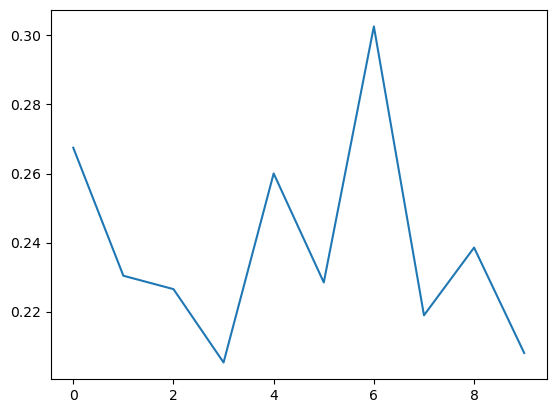

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [27]:
# mini batch gradient Descent
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)                                                    # batch_size is divided = x = n/x 

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9226 - loss: 0.2611 - val_accuracy: 0.8875 - val_loss: 0.3082
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9247 - loss: 0.2397 - val_accuracy: 0.8875 - val_loss: 0.3108
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9273 - loss: 0.2354 - val_accuracy: 0.8875 - val_loss: 0.3167
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9220 - loss: 0.2253 - val_accuracy: 0.8875 - val_loss: 0.3055
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9252 - loss: 0.2461 - val_accuracy: 0.8750 - val_loss: 0.3111
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9212 - loss: 0.2314 - val_accuracy: 0.8750 - val_loss: 0.3087
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9279 - loss: 0.2603 - val_accuracy: 0.8750 - val_loss: 0.3203
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9186 - loss: 0.2251 - val_accuracy: 0.8750 - val_loss: 0.3072

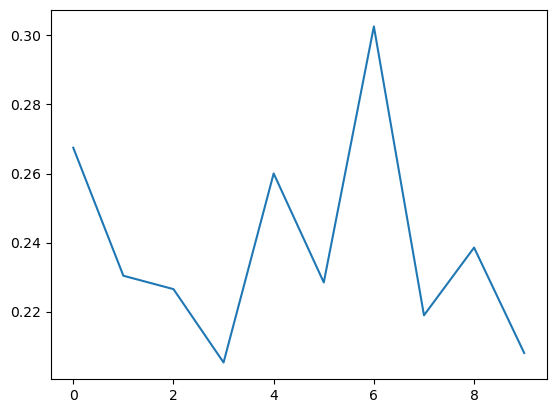

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])